In [ ]:
x_train, x_test = [], []

# 标准化

In [ ]:
from sklearn.preprocessing import StandardScaler

norm_ins = StandardScaler()
norm_ins.fit(x_train)
x_train_norm = norm_ins.transform(x_train)
x_test_norm = norm_ins.transform(x_test)

# 归一化

In [ ]:
from sklearn.preprocessing import Normalizer

norm_ins = Normalizer()
norm_ins.fit(x_train)
x_train_norm = norm_ins.transform(x_train)
x_test_norm = norm_ins.transform(x_test)

# 区间放缩法

In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm_ins = MinMaxScaler()
norm_ins.fit(x_train)
x_train_norm = norm_ins.transform(x_train)
x_test_norm = norm_ins.transform(x_test)

# 二值化

In [ ]:
from sklearn.preprocessing import Binarizer

norm_ins = Binarizer(threshold=6)
norm_ins.fit(x_train)
x_train_norm = norm_ins.transform(x_train)
x_test_norm = norm_ins.transform(x_test)

# 特征扩展

In [ ]:
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split

x_train_new = preproc.PolynomialFeatures(include_bias=False).fit_transform(x_train)
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x_train, x_train_new, y, test_size=0.3,random_state=0)


In [ ]:
from sklearn import linear_model
def evaluate_feature(x_train, x_test, y_train, y_test):
    model = linear_model.LinearRegression().fit(x_train, y_train)
    r_score = model.score(x_test, y_test)
    return model, r_score


model_1, r_score_1 = evaluate_feature(x1_train, x1_test, y_train, y_test)
model_2, r_score_2 = evaluate_feature(x2_train, x2_test, y_train, y_test)

# 特征过滤

In [ ]:

def show_feature_importance(feature_list, feature_importance):
    feature_importance = 100.0 * (feature_importance / feature_importance.max()) # 做一个区间缩放，然后映射到0到100之间。
    fi_threshold = 20  # 设定阈值
    important_idx = np.where(feature_importance > fi_threshold)[0]  # 重要特征的下标
    important_features = [feature_list[i] for i in important_idx]  # 特征名称
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]  # 重要特征
    # 可视化
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
    plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
    plt.show()

# 特征选择

In [ ]:
# 1、过滤法之方差过滤
from sklearn.feature_selection import VarianceThreshold
x_trian_new = VarianceThreshold(threshold=1).fit_transform(x_train)

In [ ]:
# 2、过滤法之皮尔逊系数过滤
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
import numpy as np

# 方式一：直接计算两者的相关系数
np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
print(pearsonr(x, x + np.random.normal(0, 1, size)))

# 方式一进阶：选择K个最好的特征，返回选择特征后的数据
SelectKBest(lambda X, Y: array(map(lambda x:pearsonr(x, Y), X.T)).T, k=2).fit_transform(iris.data, iris.target)

# 方式二：使用pandas的相关性矩阵
data_df_corr = data_df.corr(method='pearson')
print(data_df.feature_1.corr(data_df.feature_2))  #两个特征的相关系数

# 方式三：使用numpy或者直接公式计算
from numpy import mean, multiply, std, corrcoef
vc=[1,2,39,0,8]
vb=[1,2,38,0,8]
print(mean(multiply((vc-mean(vc)),(vb-mean(vb))))/(std(vb)*std(vc)))
print(corrcoef(vc,vb))

# 方式四：
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。
#参数k为选择的特征个数
# 定义函数
def multivariate_pearsonr(X, y):
    scores, pvalues = [], []
    for ret in map(lambda x:pearsonr(x, y), X.T):
        scores.append(abs(ret[0]))
        pvalues.append(ret[1])
    return (np.array(scores), np.array(pvalues))

transformer = SelectKBest(score_func=multivariate_pearsonr, k=2)
Xt_pearson = transformer.fit_transform(iris.data, iris.target)
print(Xt_pearson)

In [ ]:
# 3、过滤法之互信息过滤
from minepy import MINE
from sklearn.feature_selection import SelectKBest

# 方式一
m = MINE()
x = np.random.uniform(-1, 1, 10000)
m.compute_score(x, x**2)
print(m.mic())

# 方式一进阶：直接选择出特征
def mic(x, y):
    m_ins = MINE()
    m_ins.compute_score(x, y)
    return (m_ins.mic(), 0.5)

SelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(iris.data, iris.target)

In [ ]:
# 4、过滤法之卡方过滤：适用于离散型变量的分类问题
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)

In [ ]:
# 5、过滤法之F检验，连续型变量的分类问题，可以使用f_classif
from sklearn.feature_selection import f_regression
sk1 = SelectKBest(f_regression,k=2)
sk1.fit(X,Y)
print(sk1.scores_)
print(sk1.transform(X))

# 连续型变量的回归问题，使用f_regression
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(features_df, target)
# Get idxs of columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_df_new = features_df[cols]

In [ ]:
# 6、打包法之递归特征消除法
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
RFE(estimator=LogisticRegression(), n_features_to_select=2).fit_transform(iris.data, iris.target)

In [ ]:
# 7、嵌入式法： 前提是基学习器需要能提供feature_importance的属性
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

# 示例一：GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data, iris.target)

# 示例二：逻辑回顾作为基模型的特征选择
from sklearn.linear_model import LogisticRegression

#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(iris.data, iris.target)

# jieba分词

In [1]:
import jieba
a = ['上海自来水来自海上，所以吃葡萄不吐葡萄皮',
    '我为机器学习疯狂打call']
print([" ".join(jieba.cut(each)) for each in a], "\n")  
jieba.add_word('葡萄皮')  # 这里对葡萄皮会拆解开，所以可以增加一个专有词
print([" ".join(jieba.cut(each)) for each in a])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SUNJIA~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.125 seconds.
Prefix dict has been built successfully.


['上海 自来水 来自 海上 ， 所以 吃 葡萄 不吐 葡萄 皮', '我 为 机器 学习 疯狂 打 call'] 

['上海 自来水 来自 海上 ， 所以 吃 葡萄 不吐 葡萄皮', '我 为 机器 学习 疯狂 打 call']


# 去停用词

In [3]:
stop_words = {"的","你","我","他"}
sentence = "我为机器学习疯狂打call"
res = [each for each in jieba.cut(sentence) if each not in stop_words]
print(res)

['为', '机器', '学习', '疯狂', '打', 'call']


# 高频词低频词处理

In [ ]:
# 先获得词频字典
import math
from collections import Counter
totalNum = len(words)
word_dict = Counter(words)
word_dict = {key:value/totalNum for key,value in word_dict.items()}

def remove_low_freq(word_dict,threshold=0.0001):
    res = {key:value for key,value in word_dict.items() if value >= threshold}
    print("{} low_freq words have been removed \n".format(len(word_dict)-len(res)))
    return res

def remove_high_freq(word_dict,threshold=0.05): #阈值视词量而定
    res = {}
    removed_num = 0
    for key,value in word_dict.items():
        ran = math.sqrt(threshold/value) + threshold/value
        prob = np.random.rand()
        if prob <= ran:
            res.update({key:value})
        else:
            removed_num += 1
    print("{} high_freq words have been removed \n".format(removed_num))
    return res

# 词袋法

In [15]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer

a = ['上海自来水来自海上，所以吃葡萄不吐葡萄皮',
    '我为机器学习疯狂打call',
    '急急如意令，急急如意令']
import numpy as np
import pandas as pd
df = pd.Series(a).apply(lambda x:' '.join(jieba.cut(x)))
cv_1 = CountVectorizer()
print(cv_1.fit_transform(df).toarray())
print(cv_1.get_feature_names(), "\n")

cv_2 = CountVectorizer(ngram_range=(2,2))  # 二元语言模型，相对而言，适用于英文文本
print(cv_2.fit_transform(df).toarray())
print(cv_2.get_feature_names(), "\n")

# token_pattern指定统计词频的模式, 不指定, 默认如英文, 不统计单字
cv_3 = CountVectorizer(token_pattern='\\b\\w+\\b') 
print(cv_3.fit_transform(df).toarray())
print(cv_3.get_feature_names())

[[0 1 1 0 0 0 1 0 1 1 0 1 2]
 [1 0 0 0 1 0 0 1 0 0 1 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0 0]]
['call', '上海', '不吐', '如意', '学习', '急急', '所以', '机器', '来自', '海上', '疯狂', '自来水', '葡萄'] 

[[1 1 0 0 0 1 0 1 1 0 1 1]
 [0 0 0 1 0 0 1 0 0 1 0 0]
 [0 0 1 0 2 0 0 0 0 0 0 0]]
['上海 自来水', '不吐 葡萄', '如意 急急', '学习 疯狂', '急急 如意', '所以 葡萄', '机器 学习', '来自 海上', '海上 所以', '疯狂 call', '自来水 来自', '葡萄 不吐'] 

[[0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 2]
 [1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0]
 [0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0]]
['call', '上海', '不吐', '为', '令', '吃', '如意', '学习', '急急', '我', '所以', '打', '机器', '来自', '海上', '疯狂', '皮', '自来水', '葡萄']


# 词集法

In [6]:
import jieba
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Binarizer
a = ['上海自来水来自海上，所以吃葡萄不吐葡萄皮',
    '我为机器学习疯狂打call',
    '急急如意令，急急如意令']
df = pd.Series(a).apply(lambda x:' '.join(jieba.cut(x)))
cv_1 = CountVectorizer()
res_1 = cv_1.fit_transform(df).toarray()
print(res_1, "\n")
norm_ins = Binarizer(threshold=0) # 大于0即为1，否则为0。
res_2 = norm_ins.fit_transform(res_1)
print(res_2)

[[0 1 1 0 0 0 1 0 1 1 0 1 2]
 [1 0 0 0 1 0 0 1 0 0 1 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0 0]] 

[[0 1 1 0 0 0 1 0 1 1 0 1 1]
 [1 0 0 0 1 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0]]


# TF-IDF

In [21]:
import jieba
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  
chinese_words = ['上海自来水来自海上，所以吃葡萄不吐葡萄皮',
                '我为机器学习疯狂打call',
                '急急如意令，急急如意令']
chinese_words = [" ".join(jieba.cut(each)) for each in words]
print(chinese_words, "\n", "="*20)

# 打印向量同时，要获取其对应的词结果。则可以套一层词袋
vectorizer = CountVectorizer() 
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(chinese_words)) 
word = vectorizer.get_feature_names()  
print(word)
weight = tfidf.toarray()  
print(weight, "\n", "="*20)

# 如果使用TfidfTransformer，则需要配套使用CountVectorizer
# 但是可以直接使用TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(2,2))
english_words = ["hello world","how are you", "how do you do"]
X_train_tfidf = tfidf_vect.fit_transform(english_words)
print(X_train_tfidf.toarray())
print(tfidf_vect.get_feature_names())

['上海   自来水   来自   海上   ，   所以   吃   葡萄   不吐   葡萄   皮', '我   为   机器   学习   疯狂   打   call', '急急   如意   令   ，   急急   如意   令'] 
['call', '上海', '不吐', '如意', '学习', '急急', '所以', '机器', '来自', '海上', '疯狂', '自来水', '葡萄']
[[0.         0.31622777 0.31622777 0.         0.         0.
  0.31622777 0.         0.31622777 0.31622777 0.         0.31622777
  0.63245553]
 [0.5        0.         0.         0.         0.5        0.
  0.         0.5        0.         0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.70710678 0.         0.70710678
  0.         0.         0.         0.         0.         0.
  0.        ]] 
[[0.         0.         1.         0.         0.         0.        ]
 [0.70710678 0.         0.         0.70710678 0.         0.        ]
 [0.         0.57735027 0.         0.         0.57735027 0.57735027]]
['are you', 'do you', 'hello world', 'how are', 'how do', 'you do']


# 词性分析

In [49]:
import jieba.posseg as pseg
import numpy as np
import pandas as pd
a = ['上海自来水来自海上，所以吃葡萄不吐葡萄皮',
    '我为机器学习疯狂打call',
    '急急如意令，急急如意令']

series = pd.Series(a).apply(lambda x:' '.join(jieba.cut(x)))
series = series.apply(lambda x: pseg.cut(x))

def myFunc(x):
    res = [(each.word, each.flag) for each in x if each.word.strip()]
    return res

series = series.apply(lambda x: myFunc(x))
print(series)

0    [(上海, ns), (自来水, l), (来自, v), (海上, s), (，, x),...
1    [(我, r), (为, p), (机器, n), (学习, v), (疯狂, a), (打...
2    [(急急, a), (如意, v), (令, v), (，, x), (急急, a), (如...
dtype: object


In [10]:
import jieba
import jieba.posseg as pseg
import numpy as np
import pandas as pd
a = ['上海自来水来自海上，所以吃葡萄不吐葡萄皮',
    '我为机器学习疯狂打call',
    '急急如意令，急急如意令']

series = pd.Series(a).apply(lambda x:' '.join(jieba.cut(x)))
series = series.apply(lambda x: pseg.cut(x))

def myFunc(x, start_tag):
    res = [each.word for each in x if each is not None and each.word.strip() and each.flag.startswith(start_tag) ]
    res = list(set(res))
    return res

series = series.apply(lambda x: myFunc(x, ("n","v")))
print(series)

0    [来自, 皮, 吃, 上海, 吐, 葡萄]
1              [学习, 打, 机器]
2                  [如意, 令]
dtype: object


# 离散数据数值化

In [1]:
import pandas as pd
import numpy as np
datas = np.random.randint(1,10,(4,3))
data_df = pd.DataFrame(datas, columns=list("abc"))
data_df["sex"] = pd.Series(["F","M","F","F"])
data_df["education"] = pd.Series(["小学","大学","高中","初中"])
data_df

,a,b,c,sex,education
0,7,3,7,F,小学
1,2,3,9,M,大学
2,2,5,6,F,高中
3,8,9,1,F,初中


# 1、独热编码OneHot Encoding

In [3]:
from sklearn.preprocessing import  OneHotEncoder
encoder = OneHotEncoder(sparse=False)
origin_data = data_df.copy()
sex_data = encoder.fit_transform(origin_data["sex"].values.reshape(-1,1))  # 只对某一列操作
sex_data = pd.DataFrame(sex_data, columns=encoder.get_feature_names())
one_hot_data = pd.concat([origin_data, sex_data], axis=1).drop(["sex"], axis=1)
print(one_hot_data)

one_hot_data = encoder.fit_transform(origin_data[["sex", "education"]])  # 同时操作字符串列和汉字列
one_hot_data = pd.DataFrame(one_hot_data, columns=encoder.get_feature_names())
one_hot_data = pd.concat([origin_data, one_hot_data], axis=1).drop(["sex", "education"],axis=1)
print(one_hot_data)

   a  b  c education  x0_F  x0_M
0  9  6  1        小学   1.0   0.0
1  6  3  9        大学   0.0   1.0
2  8  9  3        高中   1.0   0.0
3  5  7  2        初中   1.0   0.0
   a  b  c  x0_F  x0_M  x1_初中  x1_大学  x1_小学  x1_高中
0  9  6  1   1.0   0.0    0.0    0.0    1.0    0.0
1  6  3  9   0.0   1.0    0.0    1.0    0.0    0.0
2  8  9  3   1.0   0.0    0.0    0.0    0.0    1.0
3  5  7  2   1.0   0.0    1.0    0.0    0.0    0.0


# 2、哑编码get_dummies

In [4]:
origin_data = data_df.copy()
sex_data = pd.get_dummies(origin_data["sex"])  # 单列数据的处理
dummies_data = pd.concat([origin_data, sex_data], axis=1).drop(["sex"], axis=1)
print(dummies_data)

multi_dummies_data = pd.get_dummies(origin_data)  # 自动将所有非数字列进行哑编码
print(multi_dummies_data)

multi_dummies_data = pd.get_dummies(origin_data[["sex","education"]])  # 手动指明哪些列需要哑编码
res = pd.concat([origin_data, multi_dummies_data], axis=1).drop(["sex", "education"], axis=1)
res

   a  b  c education  F  M
0  7  3  7        小学  1  0
1  2  3  9        大学  0  1
2  2  5  6        高中  1  0
3  8  9  1        初中  1  0
   a  b  c  sex_F  sex_M  education_初中  education_大学  education_小学  \
0  7  3  7      1      0             0             0             1   
1  2  3  9      0      1             0             1             0   
2  2  5  6      1      0             0             0             0   
3  8  9  1      1      0             1             0             0   

   education_高中  
0             0  
1             0  
2             1  
3             0  


,a,b,c,sex_M,education_大学,education_小学,education_高中
0,7,3,7,0,0,1,0
1,2,3,9,1,1,0,0
2,2,5,6,0,0,0,1
3,8,9,1,0,0,0,0


# 3、字典特征提取编码DictVectorizer

In [6]:
from sklearn.feature_extraction import DictVectorizer
origin_data = data_df.copy()
vec = DictVectorizer(sparse=False) #sparse=False意思是不用稀疏矩阵表示
target_data = pd.DataFrame(origin_data["sex"], columns=["sex"])  # 这种方式可以单抽一列或多列
vected_data = pd.DataFrame(vec.fit_transform(target_data.to_dict("records")), columns=vec.feature_names_)
vected_data = pd.concat([origin_data, vected_data], axis=1).drop(["sex"], axis=1)
print(vected_data)

vected_data = vec.fit_transform(origin_data.to_dict("records"))  # 这种方式是处理所有数据的
vected_data = pd.DataFrame(vected_data, columns=vec.feature_names_)
vected_data

   a  b  c education  sex=F  sex=M
0  7  3  7        小学    1.0    0.0
1  2  3  9        大学    0.0    1.0
2  2  5  6        高中    1.0    0.0
3  8  9  1        初中    1.0    0.0


,a,b,c,education=初中,education=大学,education=小学,education=高中,sex=F,sex=M
0,7.0,3.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,5.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0
3,8.0,9.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


# 4、map映射

In [34]:
origin_data = data_df.copy()
sex_map = {label:idx for idx, label in enumerate(set(origin_data['sex']))}  # 这种方式比较简单，不具备数值含义。
education_map = {"小学":0, "初中":1, "高中":2, "大学":3}  # 这种方式可以自定义数值含义，但取值较多时，稍显繁琐。
sex_data = origin_data["sex"].map(sex_map)
education_data = origin_data["education"].map(education_map)

mapped_data = pd.DataFrame(list(zip(sex_data, education_data)), columns=["mapped_sex", "mapped_education"])
mapped_data = pd.concat([origin_data, mapped_data], axis=1).drop(["sex", "education"], axis=1)
mapped_data

,a,b,c,mapped_sex,mapped_education
0,9,6,1,0,0
1,6,3,9,1,3
2,8,9,3,0,2
3,5,7,2,0,1


# 5、顺序编码OrdinalEncoder ：一般特征专用

In [47]:
from sklearn.preprocessing import OrdinalEncoder
origin_data = data_df.copy()
ord_encoder = OrdinalEncoder()
ordered_data = ord_encoder.fit_transform(origin_data['sex'].values.reshape(-1, 1))  # 单列操作
ordered_data = pd.DataFrame(ordered_data, columns=["order_sex"])
ordered_data = pd.concat([origin_data, ordered_data], axis=1).drop(["sex"], axis=1)
print(ordered_data)

ordered_data = ord_encoder.fit_transform(origin_data[['sex',"education"]])  # 多列操作
ordered_data = pd.DataFrame(ordered_data, columns=["order_sex","order_education"])
ordered_data = pd.concat([origin_data, ordered_data], axis=1).drop(["sex","education"], axis=1)
print(ordered_data)

ordered_data = ord_encoder.fit_transform(origin_data)  # 全数据操作,但实际上也只是会对离散型变量进行操作
ordered_data = pd.DataFrame(ordered_data, columns=origin_data.columns)
print(ordered_data)

   a  b  c education  order_sex
0  9  6  1        小学        0.0
1  6  3  9        大学        1.0
2  8  9  3        高中        0.0
3  5  7  2        初中        0.0
   a  b  c  order_sex  order_education
0  9  6  1        0.0              2.0
1  6  3  9        1.0              1.0
2  8  9  3        0.0              3.0
3  5  7  2        0.0              0.0
     a    b    c  sex  education
0  3.0  1.0  0.0  0.0        2.0
1  1.0  0.0  3.0  1.0        1.0
2  2.0  3.0  2.0  0.0        3.0
3  0.0  2.0  1.0  0.0        0.0


# 6、类别编码Label Encoding ：一般标签专用

In [60]:
from sklearn.preprocessing import LabelEncoder
origin_data = data_df.copy()
encoder = LabelEncoder()

labeled_data = encoder.fit_transform(origin_data["sex"])
labeled_data = pd.DataFrame(labeled_data, columns=["labeled_sex"])  # 处理sex列
labeled_data = pd.concat([origin_data, labeled_data], axis=1).drop(["sex"], axis=1)
print(labeled_data)

labeled_data = encoder.fit_transform(origin_data["education"])
labeled_data = pd.DataFrame(labeled_data, columns=["labeled_education"])  # 处理education列
labeled_data = pd.concat([origin_data, labeled_data], axis=1).drop(["education"], axis=1)
print(labeled_data)

   a  b  c education  labeled_sex
0  9  6  1        小学            0
1  6  3  9        大学            1
2  8  9  3        高中            0
3  5  7  2        初中            0
   a  b  c sex  labeled_education
0  9  6  1   F                  2
1  6  3  9   M                  1
2  8  9  3   F                  3
3  5  7  2   F                  0


In [22]:
import sklearn
print(sklearn.__version__)

0.19.2


# 缺失值处理

In [47]:
import numpy as np
import pandas as pd
from  sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.impute import SimpleImputer  # 简单填充缺失值的类

In [76]:
missing_value_formats = ["?", "NA", "na", "--"]
df = pd.read_csv("test_data.csv", na_values = missing_value_formats, header=None)
df

,0,1,2,3
0,1.0,2.0,3.0,4.0
1,2.0,NaN,2.0,2.0
2,NaN,2.0,3.0,4.0
3,1.0,2.0,3.0,NaN
4,1.0,NaN,3.0,4.0
5,1.0,2.0,NaN,4000.0


In [71]:
# 删除存在空值的所有样本
drop_row_df = df.dropna(inplace=False)
drop_row_df

,0,1,2,3
0,1.0,2.0,3.0,4.0


In [72]:
# 删除指定列存在空值的样本
drop_column_df = df.dropna(subset=[0,1,2], inplace=False)
drop_column_df

,0,1,2,3
0,1.0,2.0,3.0,4.0
3,1.0,2.0,3.0,NaN


In [73]:
# 使用均值、中位数、众数以及0填充
df_new = df.copy()
df_new[0] = df_new[0].fillna(df_new[0].mean())      # 第0列以均值填充
df_new[1] = df_new[1].fillna(df_new[1].median())    # 第1列以中位数填充
df_new[2] = df_new[2].fillna(df_new[2].mode()[0])   # 第2列以众数填充
df_new[3] = df_new[3].fillna(0)                     # 第3列以0填充
df_new

,0,1,2,3
0,1.0,2.0,3.0,4.0
1,2.0,2.0,2.0,2.0
2,1.2,2.0,3.0,4.0
3,1.0,2.0,3.0,0.0
4,1.0,2.0,3.0,4.0
5,1.0,2.0,3.0,4000.0


In [74]:
# 使用前向就近填充、后向就近填充、线性填充以及立方插值法填充
df_two = df.copy()
df_two[0] = df_two[0].fillna(method="ffill")        # 第0列以前向填充
df_two[1] = df_two[1].fillna(method="pad")          # 第1列以后向填充
df_two[2] = df_two[2].interpolate(method='linear')  # 第2列使用线性方法填充
df_two[3] = df_two[3].interpolate(method='pchip')   # 第3列以立方插值法填充，其他方式，可查看interpolate的API文档
df_two

,0,1,2,3
0,1.0,2.0,3.0,4.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,3.0,4.0
3,1.0,2.0,3.0,4.0
4,1.0,2.0,3.0,4.0
5,1.0,2.0,3.0,4000.0


In [75]:
# 使用随机森林预测法填充缺失值
df_three = df.copy()

def fill_dependents_missing(data, fill_column, y_label = None):
    local_df = data.copy()
    fillc = df.iloc[:, fill_column]   # 某个需要填充的列，索引为i

    # 没有被选中填充（!=）的特征与原始标签的连接起来；df就是新特征矩阵
    if y_label:
        local_df = df.iloc[:, local_df.columns != fill_column]
    else:# 如果有标签y_label列，则按下拼接
        local_df = pd.concat([local_df.iloc[:, local_df.columns != fill_column], pd.DataFrame(y_label)], axis=1) 

    # 新的特征矩阵df中，对含有缺失值的列，进行0的填补
    temp_df = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(local_df)

    # 找出训练集和测试集
    ytrain = fillc[fillc.notnull()]  # 被选中填充的特征矩阵T中的非空值
    ytest = fillc[fillc.isnull()]  # 被选中填充的特征矩阵T中的空值
    Xtrain = temp_df[ytrain.index, :]  # 新特征矩阵上，被选出来要填充的特征的非空值对应的记录
    Xtest = temp_df[ytest.index, :]   # 空值对应的记录

    # 随机森林填充缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, ytrain)
    y_predict = rfc.predict(Xtest)  # predict接口预测得到的结果就是用来填充空值的那些值

    # 将填补好的特征返回到我们的原始特征矩阵中
    data.loc[data.iloc[:, fill_column].isnull(), fill_column] = y_predict

# 对数据缺失的列依次进行缺失值预测填充
# 也可以进行固定缺失列的筛选：pd.DataFrame(df).isnull().sum()
for column in df_three.columns:
    fill_dependents_missing(df_three, column)
df_three

,0,1,2,3
0,1.00,2.0,3.0,4.000
1,2.00,2.0,2.0,2.000
2,1.04,2.0,3.0,4.000
3,1.00,2.0,3.0,1318.684
4,1.00,2.0,3.0,4.000
5,1.00,2.0,3.0,4000.000


# 特征降维

In [6]:
from sklearn.decomposition import PCA,KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import  load_iris

(150, 2)


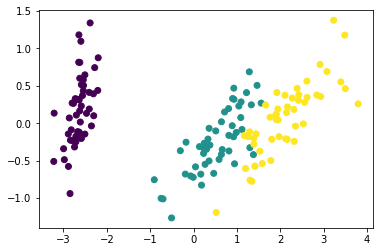

In [10]:
# PCA降维，将鸢尾花数据降维成2维数据，然后做可视化分析
iris_data = load_iris()
category = pd.Categorical(iris_data.target)  # 将标签进行量化，将字符串量化成1，2，3类等

pca_2c = PCA(n_components=2)  # 使用PCA降到2维
# pca_2c = KernelPCA(n_components=2)  # 这里两种方式都OK

x_pca_2c = pca_2c.fit_transform(iris_data.data)
print(x_pca_2c.shape)
plt.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=category.codes)
plt.show()

(150, 2)


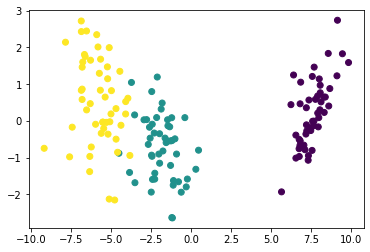

In [11]:
# LDA降维，将鸢尾花数据降维成2维数据，然后做可视化分析
iris_data = load_iris()
category = pd.Categorical(iris_data.target)  # 将标签进行量化，将字符串量化成1，2，3类等

lda_2c = LDA(n_components=2)
x_lda_2c = lda_2c.fit_transform(iris_data.data,iris_data.target)
print(x_lda_2c.shape)
plt.scatter(x_lda_2c[:,0],x_lda_2c[:,1],c=category.codes)
plt.show()

# 异常检测

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(array([1.000e+00, 1.000e+00, 8.000e+00, 1.900e+01, 3.600e+01, 5.500e+01,
        1.060e+02, 1.670e+02, 3.060e+02, 4.310e+02, 5.320e+02, 7.470e+02,
        8.130e+02, 9.350e+02, 1.085e+03, 1.015e+03, 8.770e+02, 7.960e+02,
        6.460e+02, 4.680e+02, 3.650e+02, 2.480e+02, 1.520e+02, 8.700e+01,
        5.200e+01, 3.000e+01, 1.500e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([2.62598994, 2.65112914, 2.67626834, 2.70140754, 2.72654675,
        2.75168595, 2.77682515, 2.80196436, 2.82710356, 2.85224276,
        2.87738196, 2.90252117, 2.92766037, 2.95279957, 2.97793878,
        3.00307798, 3.02821718, 3.05335638, 3.07849559, 3.10363479,
        3.12877399, 3.1539132 , 3.1790524 , 3.2041916 , 3.2293308 ,
        3.25447001, 3.27960921, 3.30474841, 3.32988762, 3.35502682,
        3.38016602]),
 <BarContainer object of 30 artists>)

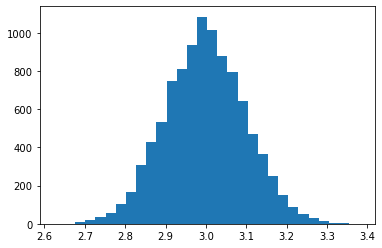

In [107]:
# 造一个均值为3，标准差为0.1的正态分布数组
mu = 3
sigma = 0.1
sampleNo = 10000;
np.random.seed(0)
sample_data = np.random.normal(mu, sigma, sampleNo)
plt.hist(sample_data, 30)

In [108]:
# 从正态分布数组中获取20个数，并串接上3个大于100，小于1000的异常值
test_data = np.append(sample_data[:20], np.random.randint(100,1000,3))
np.random.shuffle(test_data)  # 打乱数组顺序
test_data

array([112.        ,   3.1867558 ,   3.0978738 ,   2.90227221,
         3.03130677,   2.98967811,   3.04105985,   3.04438632,
         3.0121675 ,   3.22408932,   3.04001572,   3.14940791,
         3.17640523, 628.        ,   3.03336743,   3.07610377,
       517.        ,   3.01440436,   3.09500884,   2.91459043,
         2.98486428,   2.97948417,   3.14542735])

2sigma找出的异常值： {14: 3.5367215761578925, 17: 2.8488238484305586}
3sigma找出的异常值： {14: 3.5367215761578925}


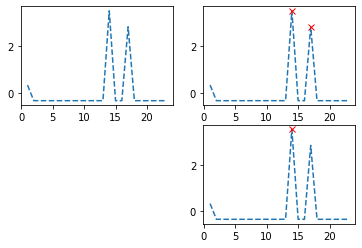

In [110]:
# 3sigma原则找异常值    2sigma：0.9544   3sigma:0.9974
new_test_data = test_data.copy()

# 将数据进行减均值，然后除上标准差，也就是将正态分布转标准正态分布。此时整体数据均值为0，方差为1。n*sigma也就等于n
new_mu, new_std = np.mean(new_test_data), np.std(new_test_data)
new_test_data = [(each-new_mu)/new_std for each in new_test_data]
two_sigma_number = {idx+1:each for idx, each in enumerate(new_test_data) if np.abs(each) > 2}
three_sigma_number = {idx+1:each for idx, each in enumerate(new_test_data) if np.abs(each) > 3}

# 这里画三幅图，左边是原始数据，右边是分别根据2sigma和3sigma标注出异常点。
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # 在画图区间内，定义2行2列plot子图中的第1个子图
ax2 = fig.add_subplot(2, 2, 2) # 定义2行2列plot子图中的第2个子图
ax3 = fig.add_subplot(2, 2, 4) # 定义2行2列plot子图中的第4个子图

x_num = np.array(range(1,23+1,1))
ax1.plot(x_num, new_test_data, "--")
ax2.plot(x_num, new_test_data, "--")
ax3.plot(x_num, new_test_data, "--")
ax2.plot(two_sigma_number.keys(), two_sigma_number.values(), "rx")  # 可以看出，用2sigma可以找出两个异常点
ax3.plot(three_sigma_number.keys(), three_sigma_number.values(), "rx")  # 用3sigma只能找到一个异常点

print("2sigma找出的异常值：", two_sigma_number)
print("3sigma找出的异常值：", three_sigma_number)

In [143]:
# 数据转pd格式，方便观察
test_data_df = pd.DataFrame(test_data.copy())
test_data_df.columns = ["number"]
test_data_df

,number
0,112.000000
1,3.186756
2,3.097874
3,2.902272
4,3.031307
5,2.989678
6,3.041060
7,3.044386
8,3.012168
9,3.224089


<AxesSubplot:>

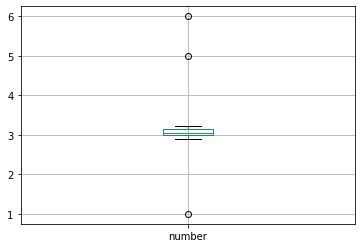

In [94]:
# 使用箱线图找异常值
new_test_data_df = test_data_df.copy()
# 这里为了让数据稍微直观美观些， 让异常值距离均值3偏离不是那么远，所以将大于100的数对100进行整除
new_test_data_df["number"] = new_test_data_df["number"].apply(lambda x: (x // 100) if x > 100 else x)  
# 先直观画图感受一下异常值点
new_test_data_df.boxplot()  # 当有多列时，可以通过column来指定目标列

In [95]:
# 找出具体的异常值点
def get_by_box(data_df, k=1.5, target_columns=None): # 默认异常系数为1.5,找到的即为异常值。也可以定义为3，找到的即为极端异常值。
    # 获取统计数据
    c = data_df.describe()
    # 四分位距IQR
    c.loc['IQR']= c.loc['75%']-c.loc['25%']
    # 最小估计值
    c.loc['LowerLimit'] = c.loc['25%'] - k*c.loc['IQR']
    # 最大估计值
    c.loc['UpperLimit'] = c.loc['75%'] + k*c.loc['IQR']

    target_columns = target_columns if target_columns else c.columns.values.tolist()

    #创建一个空的结果集
    result_df = pd.DataFrame(columns = target_columns) # 创建一个空的dataframe
    for col in target_columns:
        for row in range(0, new_test_data_df.size):
            result_df.loc[row,col] = 1 if(new_test_data_df.loc[row,col] > c.loc['UpperLimit',col] 
                                          or new_test_data_df.loc[row,col] < c.loc['LowerLimit',col]) else 0
    
    result_df.columns = [each+"_result" for each in result_df.columns]
    return pd.concat([new_test_data_df, result_df], axis=1)

result = get_by_box(new_test_data_df)
print("异常值：", result[result["number_result"]==1]["number"].tolist())
result

异常值： [1.0, 6.0, 5.0]


,number,number_result
0,1.000000,1
1,3.186756,0
2,3.097874,0
3,2.902272,0
4,3.031307,0
5,2.989678,0
6,3.041060,0
7,3.044386,0
8,3.012168,0
9,3.224089,0


In [104]:
# 使用密度聚类DBSCAN的方式检测
from sklearn.cluster import DBSCAN

test_data_dbscan = test_data.copy().reshape(-1,1)
outlier_detection = DBSCAN(min_samples=2, eps=3)
outlier = outlier_detection.fit_predict(test_data_dbscan)
print(outlier)
print("异常值：", [test_data_dbscan[idx][0] for idx,each in enumerate(outlier) if each == -1])

[-1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0]
异常值： [112.0, 628.0, 517.0]


In [129]:
# 使用OneClassSVM做异常检测
from sklearn.svm import OneClassSVM

test_data_svm = test_data.copy().reshape(-1,1)
outlier_detection = OneClassSVM(nu=0.01)  # nu指定数据集中异常值的近似比率
outlier = outlier_detection.fit_predict(test_data_svm)
print(outlier)
print("异常值：", [test_data_svm[idx][0] for idx,each in enumerate(outlier) if each == -1])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1]
异常值： [628.0, 517.0]


In [139]:
# 使用Robust covariance做异常检测
from sklearn.covariance import EllipticEnvelope

test_data_covariance = test_data.copy().reshape(-1,1)
outlier_detection = EllipticEnvelope(random_state=0)
outlier = outlier_detection.fit_predict(test_data_covariance)
print(outlier)
print("异常值：", [test_data_isolation[idx][0] for idx,each in enumerate(outlier) if each == -1])

[-1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1]
异常值： [112.0, 628.0, 517.0]


In [114]:
# 使用孤立森林的方式做异常检测
from sklearn.ensemble import IsolationForest

test_data_isolation = test_data.copy().reshape(-1,1)
outlier_detection = IsolationForest(contamination=0.1)  # contamination为异常的阈值，会比较大地影响到结果取值
outlier = outlier_detection.fit_predict(test_data_isolation)
print(outlier)
print("异常值：", [test_data_isolation[idx][0] for idx,each in enumerate(outlier) if each == -1])

[-1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1]
异常值： [112.0, 628.0, 517.0]


In [138]:
# 使用LOF的方式做异常检测
from sklearn.neighbors import LocalOutlierFactor

test_data_lof = test_data.copy().reshape(-1,1)
outlier_detection = LocalOutlierFactor(n_neighbors=15)  # n_neighbors 代表的是取的临近点的个数
outlier = outlier_detection.fit_predict(test_data_lof)
print(outlier)
print("异常值：", [test_data_lof[idx][0] for idx,each in enumerate(outlier) if each == -1])

[-1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1]
异常值： [112.0, 628.0, 517.0]


In [142]:
# 使用PYOD库来进行异常检测， 这里选择KNN和LOF两种
from pyod.models.knn import KNN 
from pyod.models.lof import LOF

test_data_pyod = test_data.copy().reshape(-1,1)
outlier_detection = KNN() 
outlier = outlier_detection.fit_predict(test_data_pyod)
print(outlier)
print("异常值：", [test_data_pyod[idx][0] for idx,each in enumerate(outlier) if each == 1])

outlier_detection = LOF() 
outlier = outlier_detection.fit_predict(test_data_pyod)
print(outlier)
print("异常值：", [test_data_pyod[idx][0] for idx,each in enumerate(outlier) if each == 1])

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
异常值： [112.0, 628.0, 517.0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0]
异常值： [3.2240893199201457, 628.0, 517.0]


D:\software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
D:\software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


# 不平衡数据的处理

In [47]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from collections import Counter

In [43]:
# 先早一些不均衡数据集，这里使用sklearn里现成的make_classification，两类数据，比重1比9，总共一百个样本。
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=2, n_redundant=0, flip_y=0,
                           n_features=2, n_clusters_per_class=1, n_samples=100,random_state=9)
print('Original dataset shape %s' % Counter(y))  # Count可以直观统计出y数据的各个类别数量

Original dataset shape Counter({1: 90, 0: 10})


In [45]:
# 上采样
X_data, y_data = X.copy(), y.copy()
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_data, y_data)  # 这里是使用的现成的上采样方式，也可以根据真实场景自己实现过采样
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 90, 0: 90})


In [50]:
# 下采样
X_data, y_data = X.copy(), y.copy()
rus = RandomUnderSampler(sampling_strategy={0: 10, 1:10},random_state=0)  # 下采样只能以少量的那个为参考依据了
X_resampled, y_resampled = rus.fit_resample(X_data, y_data)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 10, 1: 10})


In [38]:
# SMOTE方式进行生成合成数据
X_data, y_data = X.copy(), y.copy()
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_data, y_data)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 90, 0: 90})


In [39]:
# BorderlineSMOTE方式进行生成合成数据
X_data, y_data = X.copy(), y.copy()
sm = BorderlineSMOTE(kind="borderline-1")
X_resampled, y_resampled = sm.fit_resample(X_data, y_data)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 90, 0: 90})


In [40]:
# ADASYN方式进行生成合成数据
X_data, y_data = X.copy(), y.copy()
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_data, y_data)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 90, 0: 90})


In [ ]:
# 模型上处理：1、Bagging、boosting、stacking思想基本都能比较好兼容及处理不均衡数据
#            2、模型中若有class_weight，则可以通过该参数调整，
#               比如class_weight={0:1, 1:10}，及设置0类别数据权重为1,1类别数据权重为10
#            3、使用模型预测的概率值自己调整阈值，
#               示例：
#                    pred_proba = clf.predict_proba(testX)[:, 1]    # 这里clf即某种概率模型
#                    thresold = 0.75                                # 自定义阈值
#                    pred_label = pred_proba > thresold             # 重新定义预测标签，大于阈值的为true，否则为false